In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import seaborn as sns
import re
import io
import string

# New train

In [2]:
train = pd.read_csv('clean_new_train.csv', index_col=0)

In [3]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
84295,e172b3167faacde0,No worries Im glad it could be resolved so qu...,0,0,0,0,0,0,0
211131,cd9502d629dbd5df,Im going to merge the symmetric relation page ...,0,0,0,0,0,0,0
150593,6ed7734c02d969a5,Please stop introducing jokes into articles su...,0,0,0,0,0,0,0
172538,33c5f7ebd21b6c52,Ah yes I was about to ask you about that Have...,0,0,0,0,0,0,0
10876,1cbfa077b7073102,Brynna Betts Was Here Hey People You Jealous Y...,0,0,0,0,0,0,0
210269,ca19af51872b4fb3,Abortion tied to rape and incest Inclusion of...,0,0,0,0,0,0,0
220354,f2f2ee72834588f4,I posted the original statement and Im floored...,0,0,0,0,0,0,0
38868,67bafd67635b9894,Construction is due to start in summer 2008 an...,0,0,0,0,0,0,0
50758,87b8c6ef29dd1c4d,I may need assistance figuring out what to do ...,0,0,0,0,0,0,0
92734,f7f75faf17727663,However you could use the same argument to de...,0,0,0,0,0,0,0


### Logistic Regression - comment_text v. toxic

In [4]:
y_columns = "toxic"
x_columns= "comment_text"

#### Split

In [5]:
x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [6]:
x_train,y_train

(162863     Name change I understand The Hurt Locker has ...
 119621    League of Nations nor any of its bodies ever r...
 100487    Your wrong stupid Your Vandilising carlos slim...
 139154    If you dont think who started it is important ...
 191907     Ok then how about I remove the number from th...
 120915    Templates Why did you create this when you had...
 14644     SlimVirgin Youve been reported as a suspected ...
 156815    dagammit woman Im year of the boar too come on...
 78481                         My point exactly TalkieTalkie
 74469              Fuck point where i vandalised something 
 15447      Influenced by Java Per Neutral Point of View ...
 175913                          You have been banned banned
 72278     Idiot I put facts on that page You just cant g...
 79649                     they are bumholes they got killed
 130038    REDIRECT Talk2008–09 Cork senior hurling team ...
 22137     You have truly earned your namesake havent you...
 60971                  

In [7]:
TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test.values.astype('U'))

In [8]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

C:\Users\Joe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Logistic Regression Train Error

In [9]:
y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


[[17773  1056]
 [ 1883 15236]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     18829
           1       0.94      0.89      0.91     17119

    accuracy                           0.92     35948
   macro avg       0.92      0.92      0.92     35948
weighted avg       0.92      0.92      0.92     35948



#### Logistic Regression Test Error

In [10]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

[[4259  464]
 [ 740 3525]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4723
           1       0.88      0.83      0.85      4265

    accuracy                           0.87      8988
   macro avg       0.87      0.86      0.87      8988
weighted avg       0.87      0.87      0.87      8988



In [11]:
#I getting this frome stackoverflow  https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels 
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

#     plt.figure(figsize=(10, 6))
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, origin = 'lower')
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

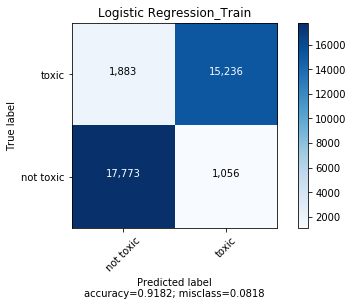

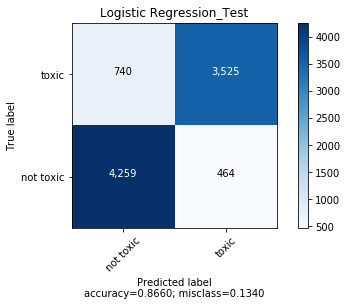

In [12]:
labels = ['not toxic', 'toxic']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

### Logistic Regression - comment_text v. severe_toxic

In [13]:
y_columns = "severe_toxic"
x_columns= "comment_text"

In [14]:
x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test.values.astype('U'))

clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

[[34184   187]
 [ 1271   306]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     34371
           1       0.62      0.19      0.30      1577

    accuracy                           0.96     35948
   macro avg       0.79      0.59      0.64     35948
weighted avg       0.95      0.96      0.95     35948

[[8529   74]
 [ 304   81]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8603
           1       0.52      0.21      0.30       385

    accuracy                           0.96      8988
   macro avg       0.74      0.60      0.64      8988
weighted avg       0.95      0.96      0.95      8988



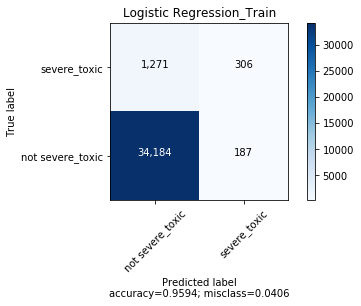

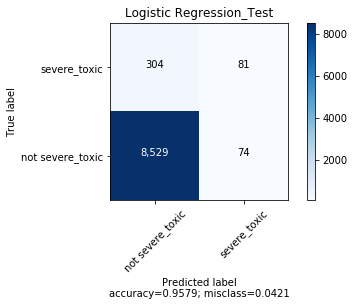

In [16]:
labels = ['not severe_toxic', 'severe_toxic']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

### Logistic Regression - comment_text v. obscene

[[25718   535]
 [ 2819  6876]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     26253
           1       0.93      0.71      0.80      9695

    accuracy                           0.91     35948
   macro avg       0.91      0.84      0.87     35948
weighted avg       0.91      0.91      0.90     35948

[[6352  191]
 [ 798 1647]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6543
           1       0.90      0.67      0.77      2445

    accuracy                           0.89      8988
   macro avg       0.89      0.82      0.85      8988
weighted avg       0.89      0.89      0.88      8988



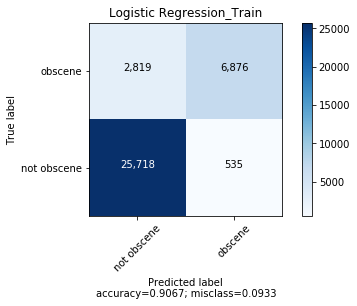

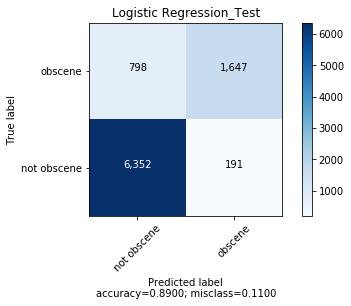

In [17]:
y_columns = "obscene"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test.values.astype('U'))

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not obscene', 'obscene']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

### Logistic Regression - comment_text v. threat

[[35342    28]
 [  485    93]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     35370
           1       0.77      0.16      0.27       578

    accuracy                           0.99     35948
   macro avg       0.88      0.58      0.63     35948
weighted avg       0.98      0.99      0.98     35948

[[8867   10]
 [  90   21]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8877
           1       0.68      0.19      0.30       111

    accuracy                           0.99      8988
   macro avg       0.83      0.59      0.65      8988
weighted avg       0.99      0.99      0.99      8988



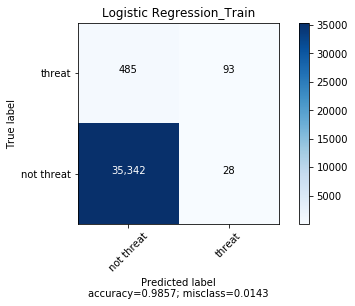

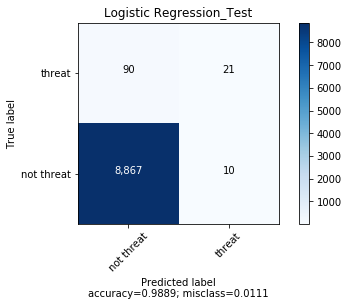

In [18]:
y_columns = "threat"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test.values.astype('U'))

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not threat', 'threat']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

### Logistic Regression - comment_text v. insult

[[26028   888]
 [ 3436  5596]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     26916
           1       0.86      0.62      0.72      9032

    accuracy                           0.88     35948
   macro avg       0.87      0.79      0.82     35948
weighted avg       0.88      0.88      0.87     35948

[[6418  298]
 [ 967 1305]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6716
           1       0.81      0.57      0.67      2272

    accuracy                           0.86      8988
   macro avg       0.84      0.77      0.79      8988
weighted avg       0.86      0.86      0.85      8988



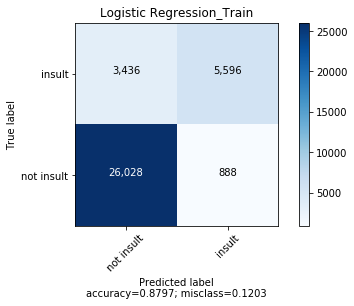

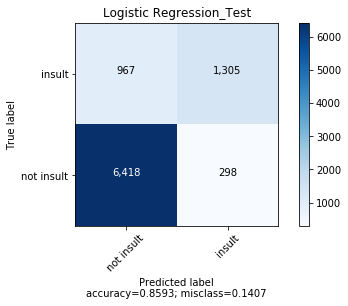

In [19]:
y_columns = "insult"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test.values.astype('U'))

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not insult', 'insult']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

### Logistic Regression - comment_text v. identity_hate

[[34148    99]
 [ 1267   434]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     34247
           1       0.81      0.26      0.39      1701

    accuracy                           0.96     35948
   macro avg       0.89      0.63      0.68     35948
weighted avg       0.96      0.96      0.95     35948

[[8533   39]
 [ 313  103]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8572
           1       0.73      0.25      0.37       416

    accuracy                           0.96      8988
   macro avg       0.84      0.62      0.67      8988
weighted avg       0.95      0.96      0.95      8988



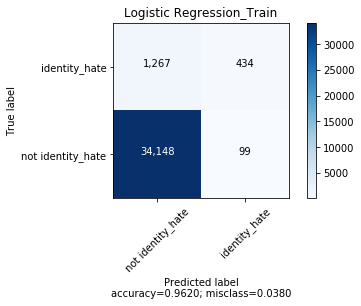

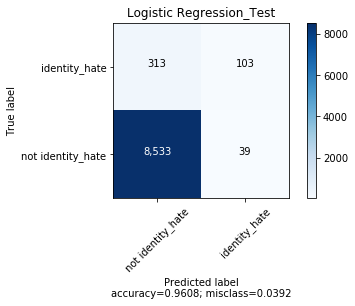

In [20]:
y_columns = "identity_hate"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test.values.astype('U'))

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not identity_hate', 'identity_hate']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

In [21]:
import pandas as pd
import numpy as np

In [23]:
stat = pd.DataFrame(np.array([[0.0818,0.1340],[0.0406,0.0421],[0.0933,0.1100],[0.0143,0.0111],[0.1203,0.1407],[0.0380,0.0392]]),
                   columns=['Train Error', 'Test Error'],
                   index=['Toxic','Severe Toxic','Obscene','Threat','Insult','Identity_hate'])
stat

,Train Error,Test Error
Toxic,0.0818,0.1340
Severe Toxic,0.0406,0.0421
Obscene,0.0933,0.1100
Threat,0.0143,0.0111
Insult,0.1203,0.1407
Identity_hate,0.0380,0.0392


In [26]:
(100. * stat).round(2).astype(str) + '%'

,Train Error,Test Error
Toxic,8.18%,13.4%
Severe Toxic,4.06%,4.21%
Obscene,9.33%,11.0%
Threat,1.43%,1.11%
Insult,12.03%,14.07%
Identity_hate,3.8%,3.92%
